In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

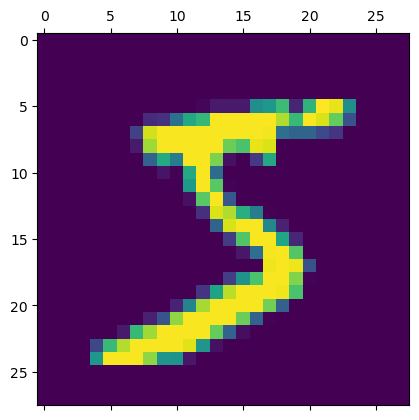

In [7]:
plt.matshow(X_train[0])

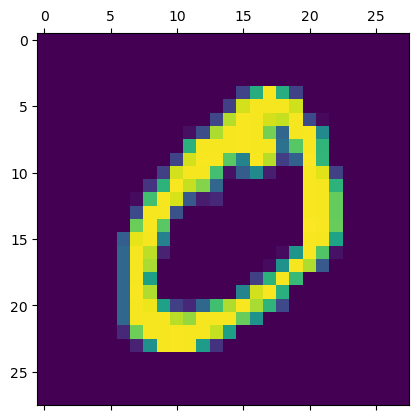

In [8]:
plt.matshow(X_train[1])

In [9]:
y_train[0]

5

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape#here the first number is number of samples, and the second and third number are the m*n which is the size of the image

(60000, 28, 28)

## Scaling the data for better accuracy


In [12]:
X_train = X_train/255;
X_test = X_test/255;

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Flattening the data from 2-D to 1-D 

In [16]:
X_train_flatten = X_train.reshape(len(X_train),28*28)

In [17]:
X_train_flatten.shape

(60000, 784)

In [18]:
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [19]:
X_test_flatten.shape

(10000, 784)

In [20]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Creating a simple neural network


In [21]:
# Keras.Sequential accepts everything as a stack
#called dense bc all neuron in one layer are connected to all neurons in the second layer
#created a simple neural network
#sparse_categorical_crossentropy: sparse because our y_train is integer number and categorical because the output has to be categorized into numbers
#epoch is a kinda layer or a loop
model = keras.Sequential([                                   
    keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')    
])
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4695 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9252


In [22]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2663 - accuracy: 0.9265


[0.26629048585891724, 0.9265000224113464]

## Checking predictions

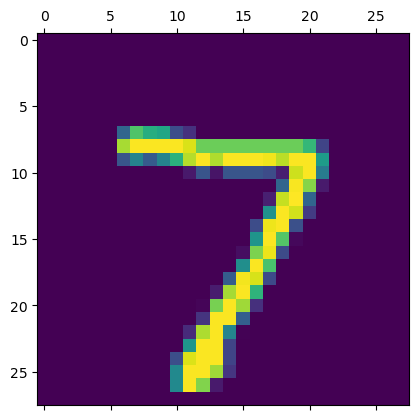

In [24]:
plt.matshow(X_test[0])

In [25]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]
#we get an array of ten because in this array we get the probability of the number so if we count for 7 we get 9.9972385e-01 
#which is a good score

313/313 [==============================] - 1s 1ms/step


array([3.0348813e-02, 4.4367127e-07, 6.4938322e-02, 9.5324767e-01,
       2.7017184e-03, 9.9670850e-02, 1.7220611e-06, 9.9972385e-01,
       1.0520214e-01, 7.0561320e-01], dtype=float32)

In [26]:
np.argmax(y_predicted[0])
#returns the index with max probability and we have the number 7 present at the 7th index in the above array

7

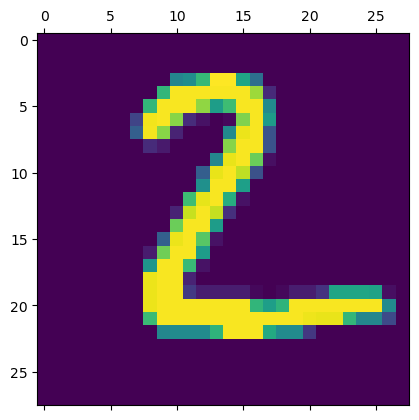

In [27]:
plt.matshow(X_test[1])

In [28]:
y_predicted[1]

array([4.9621278e-01, 7.5914869e-03, 9.9957365e-01, 3.6561808e-01,
       6.7154959e-10, 8.3683711e-01, 9.1635823e-01, 9.9131521e-13,
       1.6262899e-01, 3.5345089e-09], dtype=float32)

In [29]:
np.argmax(y_predicted[1])

2

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [33]:
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

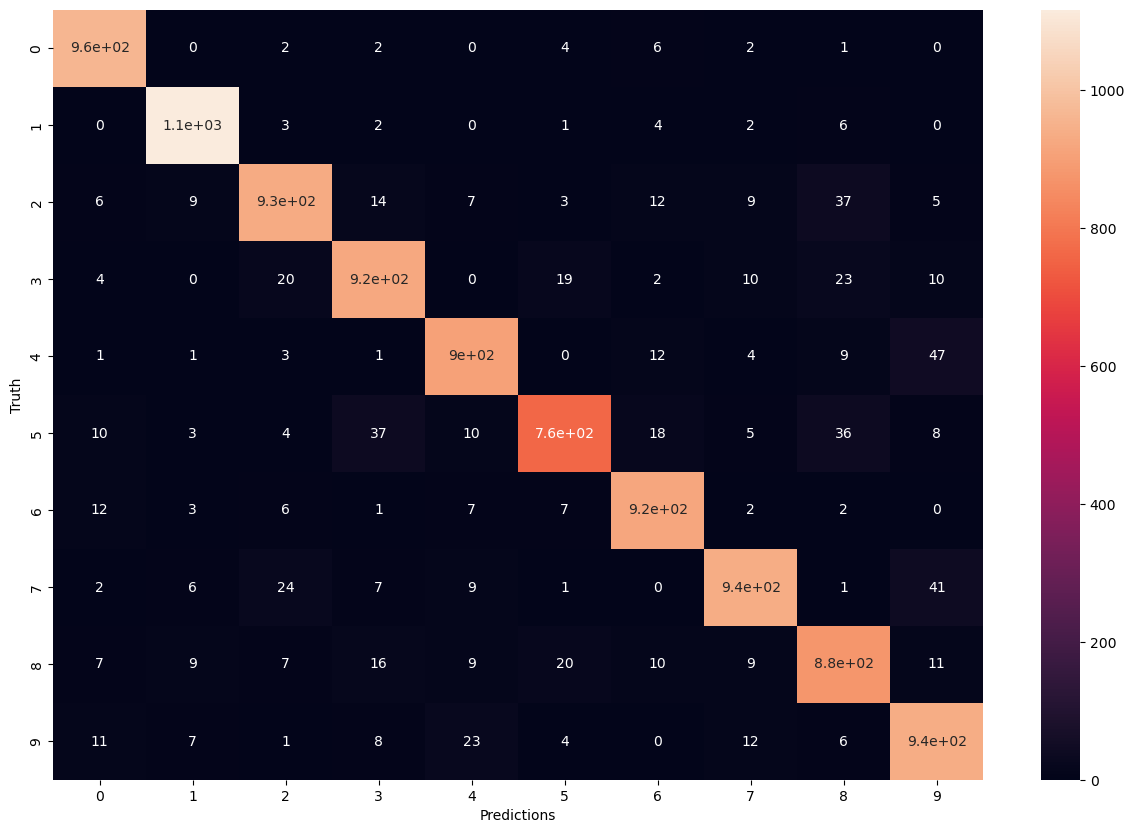

In [38]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.show()

## Adding a hidden layer 

In [39]:
model = keras.Sequential([                                   
    keras.layers.Dense(100,input_shape = (784,),activation='relu'), #creating a hidden layer 
    keras.layers.Dense(10,activation='sigmoid')                       #hidden layer can figure out input shape
])
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2750 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1272 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0879 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0667 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0551 - accuracy: 0.9829


In [40]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9745


[0.08418925106525421, 0.9745000004768372]

313/313 [==============================] - 1s 2ms/step


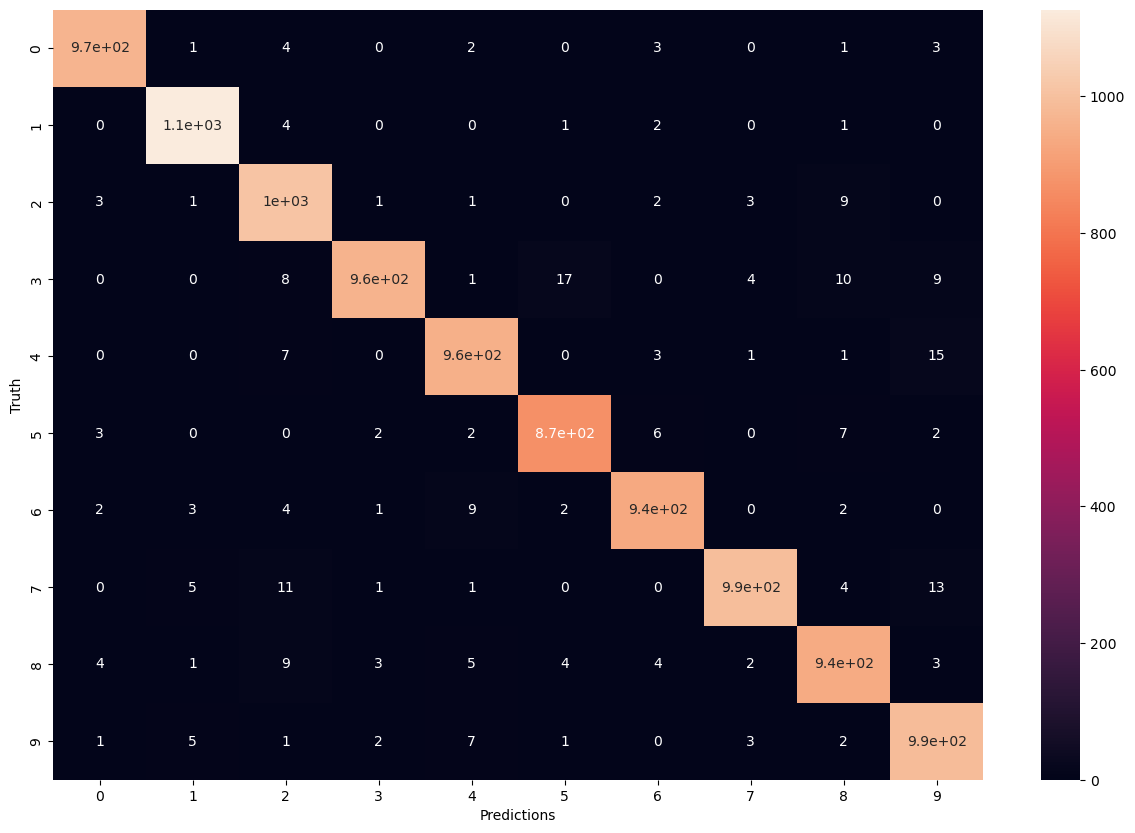

In [41]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.show()

## Way of Flattening using Keras 

In [44]:
model = keras.Sequential([   
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'), 
    keras.layers.Dense(10,activation='sigmoid')                      
])
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2696 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1246 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0878 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0672 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0533 - accuracy: 0.9840
